In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [4]:
import pandas as pd

df = pd.read_csv('./data/innovaid_hackathon_anima/input/0aa0abPoXao4AYllJqUT.csv')
df

,Unnamed: 0,TIMESTAMP,BPOGX,BPOGY,RX,RY,SCENE_INDEX,IMAGE,IMAGE_POSITION,IMAGE_TYPE,IMAGE_TAGS
0,0,59320.0,1040.30,170.40,0.722431,0.189333,1.0,49478888.0,right,positive,happy face man positive
1,1,59335.5,1037.35,153.85,0.720382,0.170944,1.0,NaN,NaN,NaN,NaN
2,2,59351.0,1034.40,137.30,0.718333,0.152556,1.0,NaN,NaN,NaN,NaN
3,3,59368.5,1046.40,175.60,0.726667,0.195111,1.0,49478888.0,right,positive,happy face man positive
4,4,59386.0,1058.40,213.90,0.735000,0.237667,1.0,49478888.0,right,positive,happy face man positive
...,...,...,...,...,...,...,...,...,...,...,...
7518,7518,239446.0,424.30,407.40,0.294653,0.452667,99.0,49492812.0,left,positive,happy face positive woman
7519,7519,239463.0,425.65,414.80,0.295590,0.460889,99.0,49492812.0,left,positive,happy face positive woman
7520,7520,239480.0,427.00,422.20,0.296528,0.469111,99.0,49492812.0,left,positive,happy face positive woman
7521,7521,239505.5,425.65,427.25,0.295590,0.474722,99.0,49492812.0,left,positive,happy face positive woman


In [51]:
def plot(file, i=0):
    df = pd.read_csv(file)
    f, t, Sxx = signal.spectrogram(df['RX'], 30)
    axs[i][0].pcolormesh(t, f, Sxx, shading='gouraud', cmap='magma')
    axs[i][0].set_ylabel('Frequency [Hz]')
    axs[i][0].set_xlabel('Time [sec]')
    axs[i][0].set_ylim(0, 5)

    f, t, Sxx = signal.spectrogram(df['RY'], 30)
    axs[i][1].pcolormesh(t, f, Sxx, shading='gouraud', cmap='magma')
    axs[i][1].set_ylabel('Frequency [Hz]')
    axs[i][1].set_xlabel('Time [sec]')
    axs[i][1].set_ylim(0, 5)

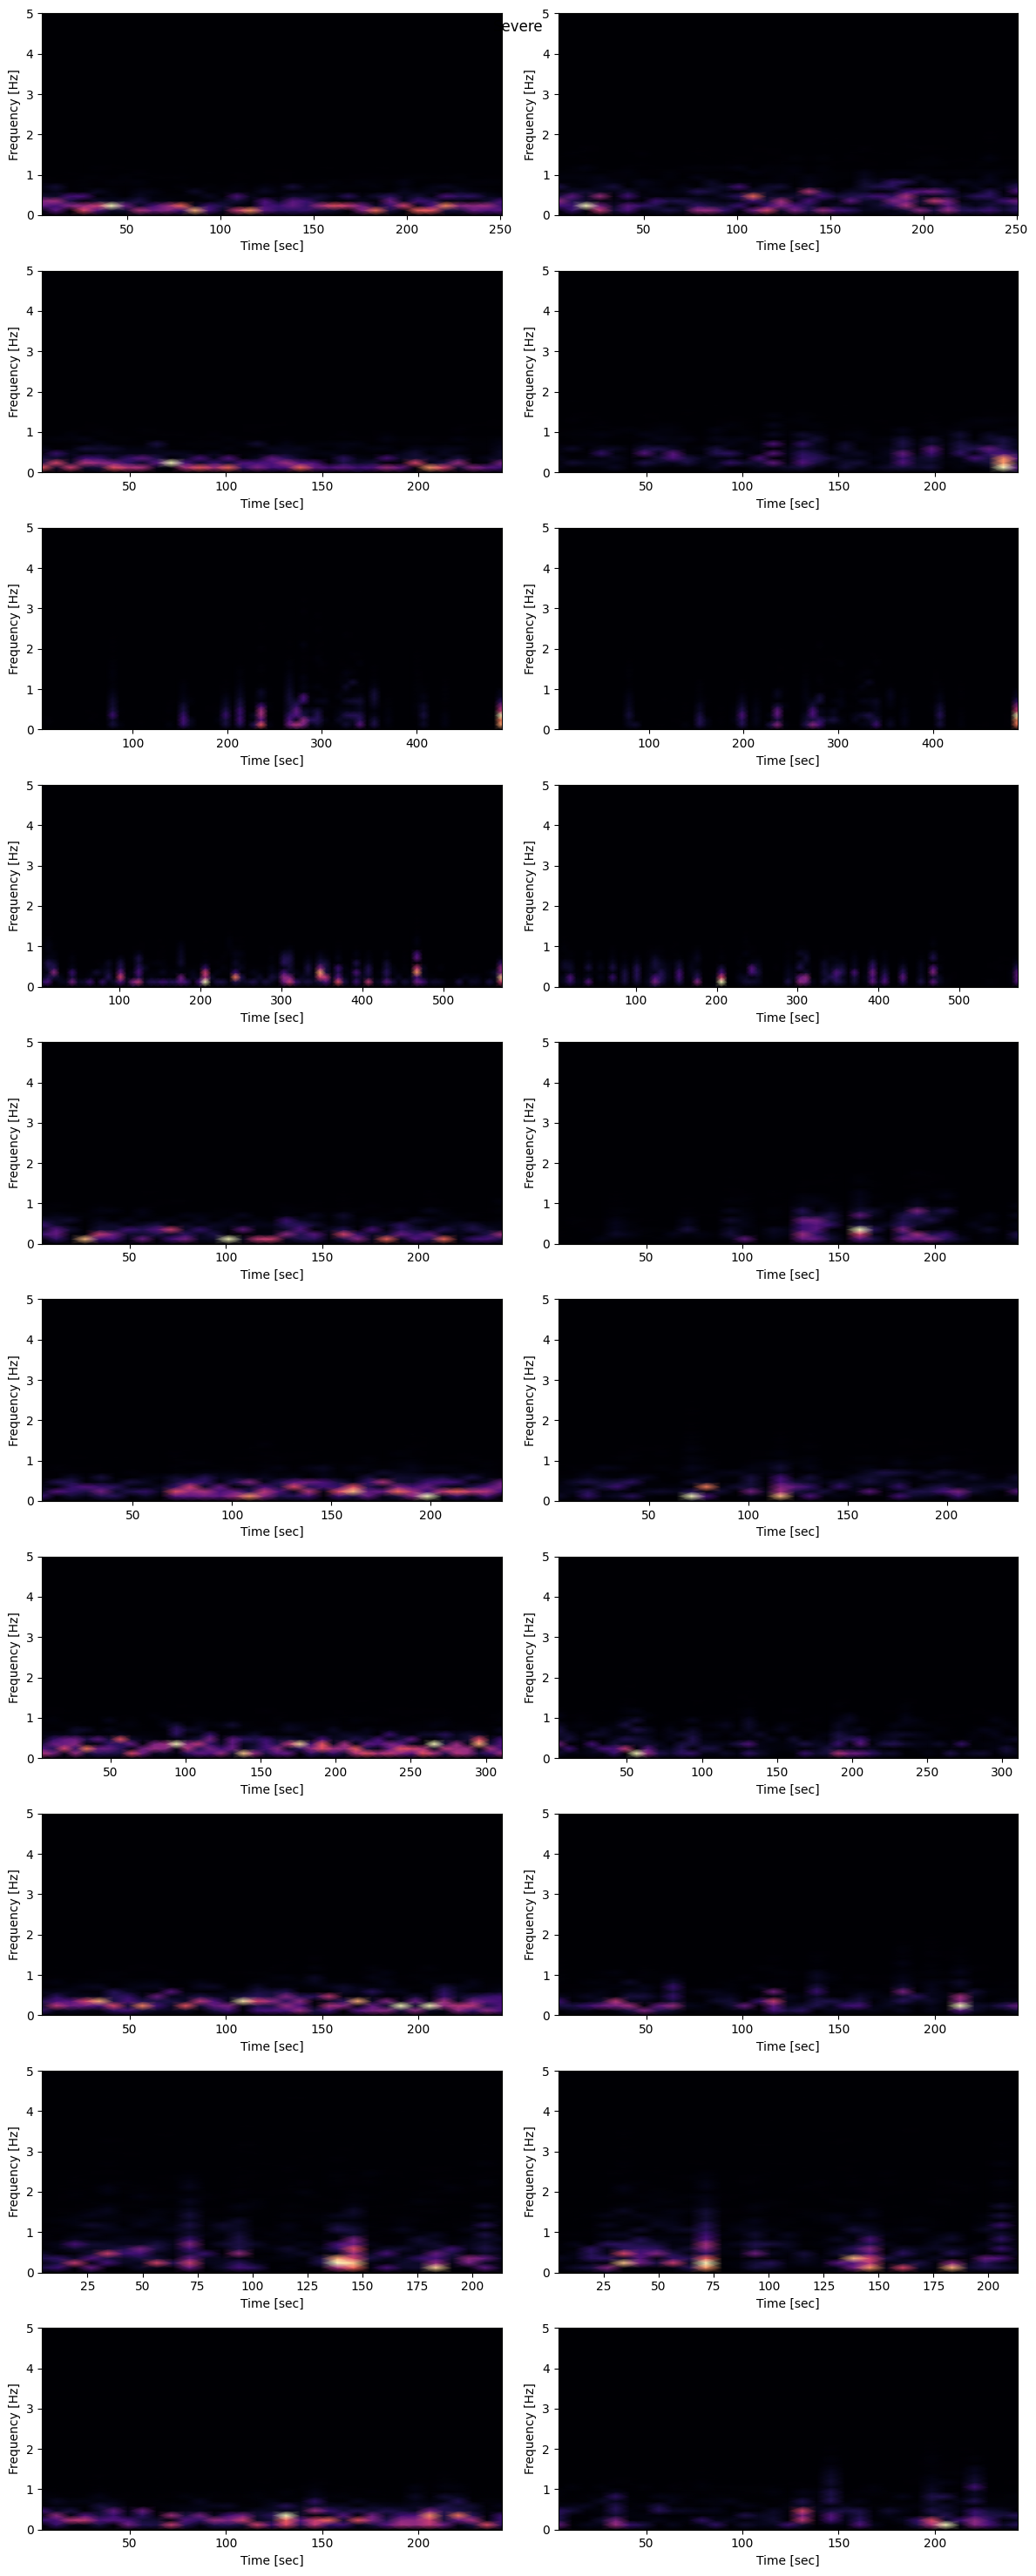

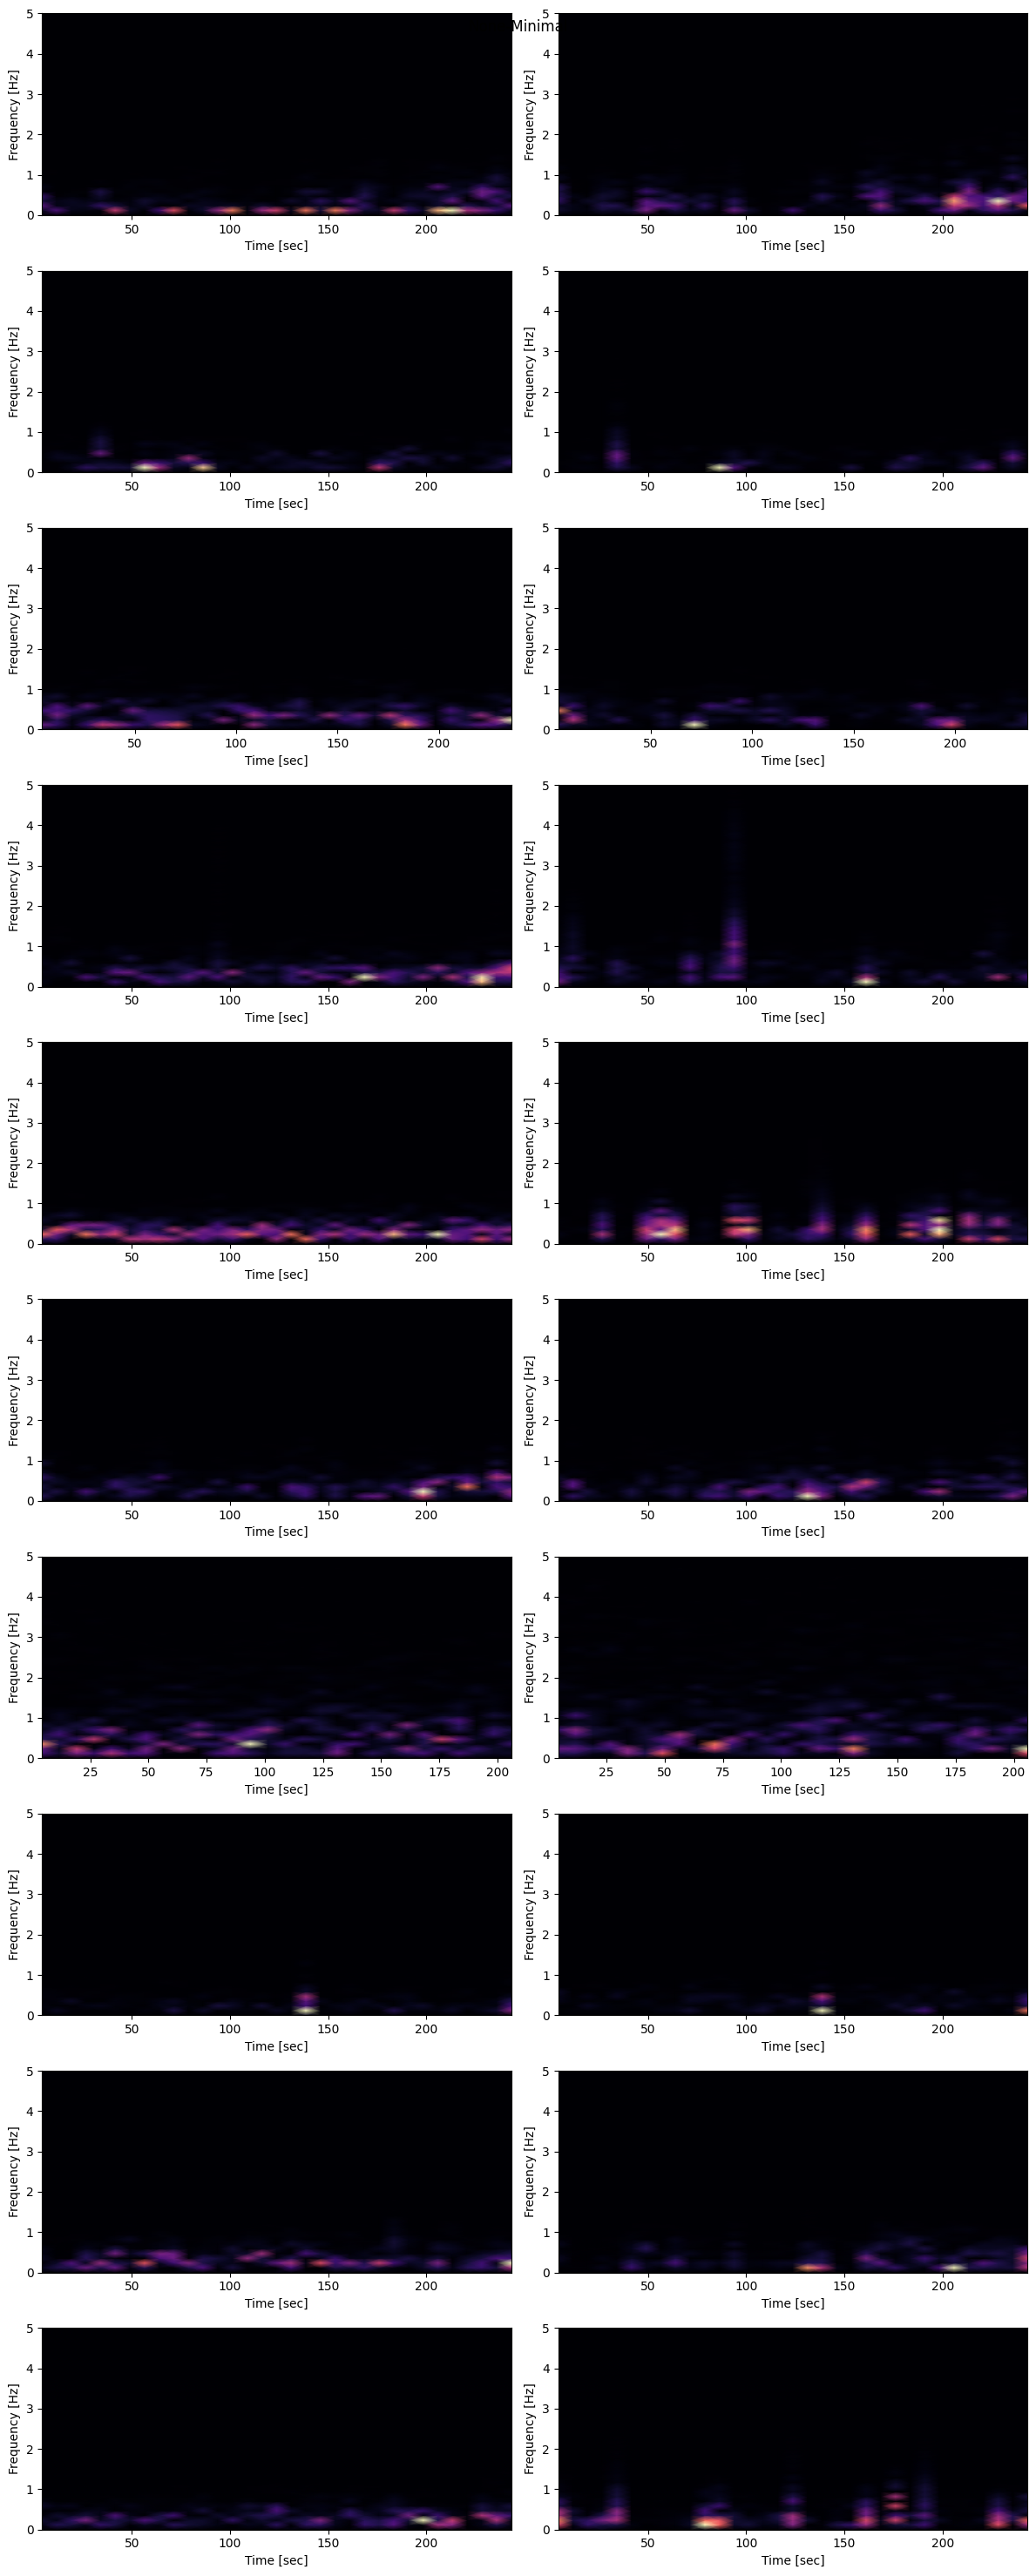

In [54]:
df_labels = pd.read_csv('data/innovaid_hackathon_anima/output_classes.csv')
severe_files = df_labels[df_labels['depression_severity'] == 'Severe']['sid']
min_files = df_labels[df_labels['depression_severity'] == 'None-Minimal']['sid']

i = 0
fig, axs = plt.subplots(ncols=2, nrows=10, figsize=(12, 30))
for f in severe_files[:10]:
    plot('data/innovaid_hackathon_anima/input/' + f + '.csv', i)
    i += 1
plt.suptitle('Severe')
plt.tight_layout()
plt.show()


i = 0
fig, axs = plt.subplots(ncols=2, nrows=10, figsize=(12, 30))
for f in min_files[:10]:
    plot('data/innovaid_hackathon_anima/input/' + f + '.csv', i)
    i += 1
plt.suptitle('None-Minimal')
plt.tight_layout()
plt.show()